In [220]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [222]:
from IPython.display import HTML
style = "<style>svg{width:30% !important; height: 30% !important;}</style>"

In [223]:
titanic_data = pd.read_csv('titanic/train.csv')

In [224]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [227]:
X = pd.get_dummies(X)

In [228]:
X = X.fillna({"Age": X.Age.median()})

In [229]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [230]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [231]:
'''
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))
'''

"\ngraph = Source(tree.export_graphviz(clf, out_file=None,\n                                   feature_names=list(X),\n                                   class_names=['Died', 'Survived'],\n                                   filled = True))\ndisplay(SVG(graph.pipe(format='svg')))\n"

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [234]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [235]:
clf.score(X_train, y_train)

0.9798657718120806

In [236]:
clf.score(X_test, y_test)

0.7762711864406779

In [237]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [238]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [239]:
clf.score(X_train, y_train)

0.8238255033557047

In [240]:
clf.score(X_test, y_test)

0.8203389830508474

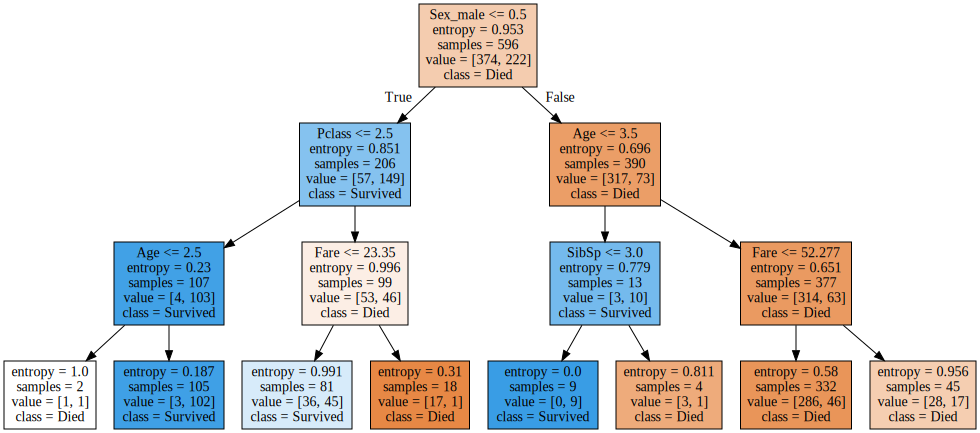

In [241]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [242]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [243]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [244]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.801984


In [245]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score','cross_val_score'],
                           var_name='set_type', value_name='score')

In [246]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [247]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.801984
203,6,cross_val_score,0.793721
204,7,cross_val_score,0.793637
205,8,cross_val_score,0.790176
206,9,cross_val_score,0.805359
207,10,cross_val_score,0.805373


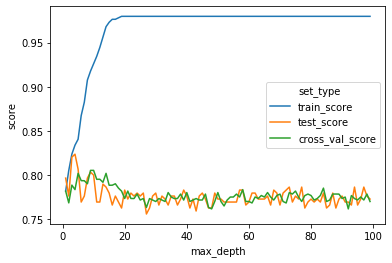

In [248]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [249]:
from sklearn.model_selection import cross_val_score

In [250]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [251]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7751189289275031

-----------------------------------------------------
Iris Practice
--------------------------------------------------------

In [252]:
data_iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
data_iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

y_train = data_iris_train.species
X_train = data_iris_train.drop('species', axis=1)

y_test = data_iris_test.species
X_test = data_iris_test.drop('species', axis=1)

In [253]:
max_depth_iris = range(1, 100)
scores_data_iris = pd.DataFrame()
np.random.seed(0)

In [254]:

for max_depth in max_depth_iris:
    iris_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=np.random.seed(0))
    iris_clf.fit(X_train, y_train)
    
    train_score = iris_clf.score(X_train, y_train)
    
    test_score = iris_clf.score(X_test, y_test)
    
    tmp = pd.DataFrame({'max_depth': [max_depth],
                        'train_score': [train_score],
                        'test_score': [accuracy],
                        'cross_val_score': [mean_cross_val_score]
                      })
    
    iris_mean_cross_val_score = cross_val_score(iris_clf, X_train, y_train, cv=5).mean()

    scores_data_iris = scores_data_iris.append(tmp)

In [255]:
scores_data_long_iris = pd.melt(scores_data_iris, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score','cross_val_score'],
                           var_name='set_type', value_name='score')

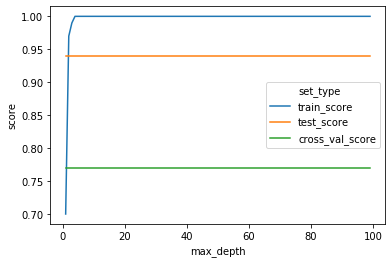

In [256]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long_iris)

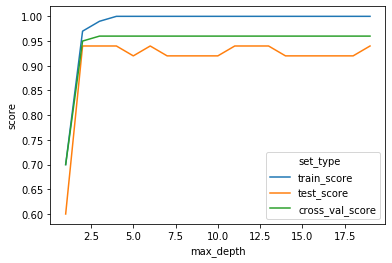

In [257]:
import sklearn
from sklearn import metrics as skm
data_iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
data_iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

y_train = data_iris_train.species
X_train = data_iris_train.drop('species', axis=1)

y_test = data_iris_test.species
X_test = data_iris_test.drop('species', axis=1)

max_depth_values = range(1,20)
scores_data = pd.DataFrame()
np.random.seed(0)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    accuracy = skm.accuracy_score(y_test, y_pred)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    tmp = pd.DataFrame({'max_depth': [max_depth],
                        'train_score': [train_score],
                        'test_score': [accuracy],
                        'cross_val_score': [mean_cross_val_score]
                      })
    scores_data = scores_data.append(tmp)

scores_data_long = pd.melt(scores_data,
                          id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

-----------------
Dogs and Cats Practice
---------------------------------------

In [258]:
cd_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
cd_test = pd.read_json('dataset_209691_15.txt')
cd_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [259]:
X_train_cd = cd_train.drop(['Вид'], axis=1)
y_train_cd = cd_train['Вид']
X_test_cd = cd_test

In [260]:
cd_clf = tree.DecisionTreeClassifier(criterion='entropy')
cd_clf.fit(X_train_cd, y_train_cd)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [261]:
hh = cd_clf.predict(X_test_cd)
l = list(hh)
l.count('собачка')

45

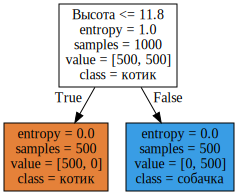

In [262]:
graph = Source(tree.export_graphviz(cd_clf, out_file=None,
                                   feature_names=list(X_train_cd),
                                   class_names=['котик', 'собачка'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))